# Office31

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.patheffects as pe
%matplotlib inline
from sklearn.manifold import TSNE

import seaborn as sb
import numpy as np

In [5]:
D= scipy.io.loadmat('/content/dslr_OTSA.mat') 
A=scipy.io.loadmat('/content/amazon_OTSA.mat')

In [6]:
x_data = D['Xs']
print(x_data.shape)
Xs_new = np.reshape(x_data,[-1, x_data.shape[-1]])
Xs_new.shape

(15, 32, 256)


(480, 256)

In [7]:
ys = D['Ys']
#type(y_data)
print(ys.shape)

(15, 32)


In [8]:
ys_new = np.reshape(ys, [-1])
ys_new.shape

(480,)

In [9]:
x_data = A['Xt']
print(x_data.shape)
Xt_new = np.reshape(x_data,[-1, x_data.shape[-1]])
Xt_new.shape

(15, 32, 256)


(480, 256)

In [10]:
yt = A['Yt']
#type(y_data)
print(yt.shape)

(15, 32)


In [11]:
yt_new = np.reshape(yt, [-1])
yt_new.shape

(480,)

In [12]:
fsz=pd.DataFrame(data=Xs_new) # source
ftz=pd.DataFrame(data=Xt_new) # Target
yzs=pd.DataFrame(data=ys_new) #
yzt=pd.DataFrame(data=yt_new) #
#yzst=pd.DataFrame(data=yzst) #both label

In [13]:
fsz.shape

(480, 256)

In [14]:
ftz.shape

(480, 256)

In [15]:
yzs.shape

(480, 1)

In [16]:
yzt.shape

(480, 1)

concatination source and target domain

In [17]:
Xst=pd.concat((fsz,ftz))

In [18]:
Xst.shape

(960, 256)

In [19]:
ys=np.array(ys_new)
ys.shape

(480,)

In [20]:
yt=np.array(yt_new)
yt.shape

(480,)

In [21]:
yst=np.concatenate((ys,yt))
yst.shape

(960,)

In [22]:
Yst_new= np.hstack([ys[yt==i] for i in range(31)])
Yst_new.shape

(480,)

In [24]:
Xst = np.vstack([Xst[yst==i] for i in range(31)])
Xst.shape

(960, 256)

#Apply Tsne

In [25]:
#Implementing the TSNE Function - ah Scikit learn makes it so easy!
office31 = TSNE(perplexity=50).fit_transform(Xst) 
#Play around with varying the parameters like perplexity, random_state to get different plots

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [33]:
#With the above line, our job is done. But why did we even reduce the dimensions in the first place?
#To visualise it on a graph.

#So, here is a utility function that helps to do a scatter plot of thee transformed data 

def plot(x, colors):
  
    palette = np.array(sb.color_palette("hls",31))  #Choosing color palette "

    # Create a scatter plot.
    f = plt.figure(figsize=(3, 3))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(31):
        #Position of each label.
        # xtext, ytext = np.median(x[colors == i, :], axis=0)
        # txt = ax.text(xtext, ytext, str(i), fontsize=24)
        # txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        # txts.append(txt)
        return f, ax  #,txts

<ipython-input-33-aa3f61a6fc1a>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 216x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f685f953a90>)

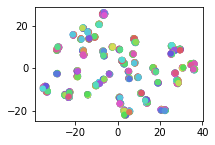

In [34]:
plot(office31,yst)

In [30]:
ns=fsz.shape[0]
nt=ftz.shape[0]

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


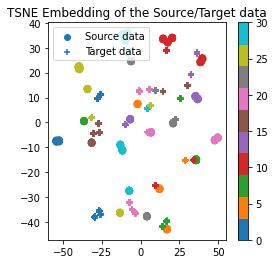

In [35]:
import numpy as np # always need it
import pylab as pl # do the plots

xtot=np.concatenate((fsz,ftz),axis=0) # all data

xp=TSNE().fit_transform(xtot) # this maigh take a while (30 sec on my laptop)

# separate again but now in 2D
xps=xp[:ns,:] 
xpt=xp[ns:,:]


# In[6]:



pl.figure(3,(4,4))

pl.scatter(xps[:,0],xps[:,1],c=ys,marker='o',cmap='tab10',label='Source data')
pl.scatter(xpt[:,0],xpt[:,1],c=yt,marker='+',cmap='tab10',label='Target data')
pl.legend()
pl.colorbar()
pl.title('TSNE Embedding of the Source/Target data');